## Analiza rabljenih avtomobilov

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

avti = pd.read_csv("../podatki/rabljeni_avtomobili.csv", index_col=0)
avti.sample(3)

,ime_znamke,ime_modela,ime_razlicice,tip_modela,menjalnik,vrsta_motorja,stevilo_vrat,stevilo_prestav,konjske_moci,kilovati,prostornina_motorja,povezava,naslov_oglasa,leto_izdelave,stevilo_kilometrov,cena,platforma,id_razlicice,id_modela
23603,RENAULT,Grand Scenic,Grand Scenic,KOMBI,ROČNI,DIEZEL,5.0,NaN,NaN,81.0,1.461,https://www.bolha.com/avto-oglasi/renault-gran...,Renault Grand Scenic dCi 110 Energy Expression...,2014.0,11111.0,NaN,bolha,22357.0,2214.0
15953,Renault,Megane,Megane Sedan,NaN,ROČNI,DIEZEL,NaN,6.0,110.0,81.0,1.461,https://www.avto.net/Ads/details.asp?id=174627...,Renault Megane Energy dCi 110 INTENS,2017.0,139500.0,11450.0,avtonet,21838.0,2201.0
22109,Volkswagen,Touran,CrossTouran,KOMBI,ROČNI,DIEZEL,NaN,6.0,105.0,77.0,1.896,https://www.avto.net/Ads/details.asp?id=177541...,Volkswagen Touran 1.9 TDI Highline-XENON-TEMPO...,2008.0,268000.0,5999.0,avtonet,27756.0,2651.0


In [3]:
avti["starost"] = 2022 - avti.leto_izdelave

## Normirane cene

ceno avtomobila bom normiral s povprečno ceno avtomobila istega modela, ki je bil izdelan letos.

In [4]:
nazivne_cene_modelov = avti[(avti.leto_izdelave == 2022) & (avti.stevilo_kilometrov < 5e3)].groupby(["ime_znamke", "ime_modela"]).cena.mean().rename("nazivna_cena")
avti_z_nc = pd.merge(avti, nazivne_cene_modelov, on=["ime_znamke", "ime_modela"])
avti_z_nc["normirana_cena"] = avti_z_nc.cena / avti_z_nc.nazivna_cena

#### Vpliv starosti

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

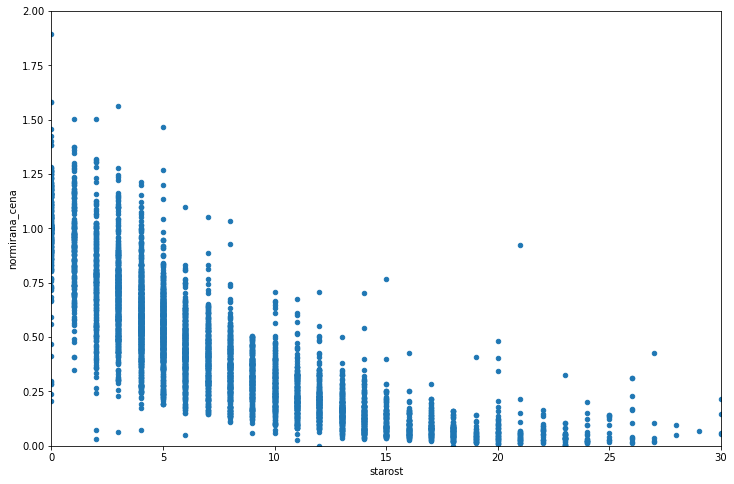

In [5]:
avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    figsize=(12,8)
)

#### Vpliv števila kilometrov

<AxesSubplot:xlabel='stevilo_kilometrov', ylabel='normirana_cena'>

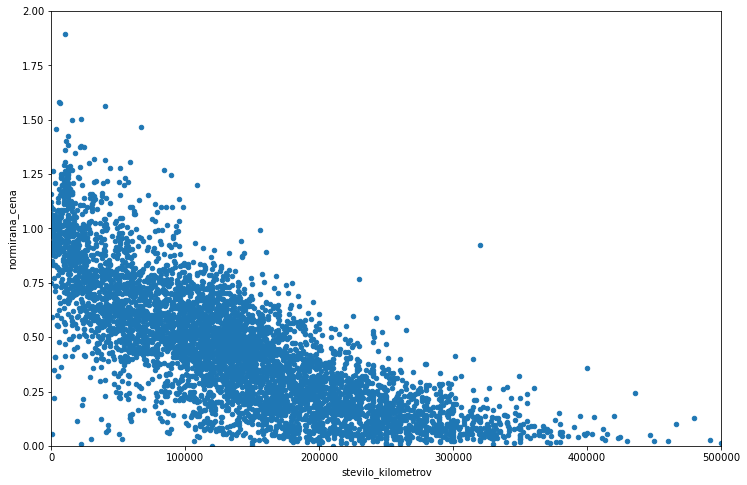

In [6]:
avti_z_nc.plot.scatter("stevilo_kilometrov", "normirana_cena", xlim=(0, 0.5e6), ylim=(0,2), figsize=(12,8))

#### Vpliv starosti in kilometrov
temneje -> več kilometrov

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

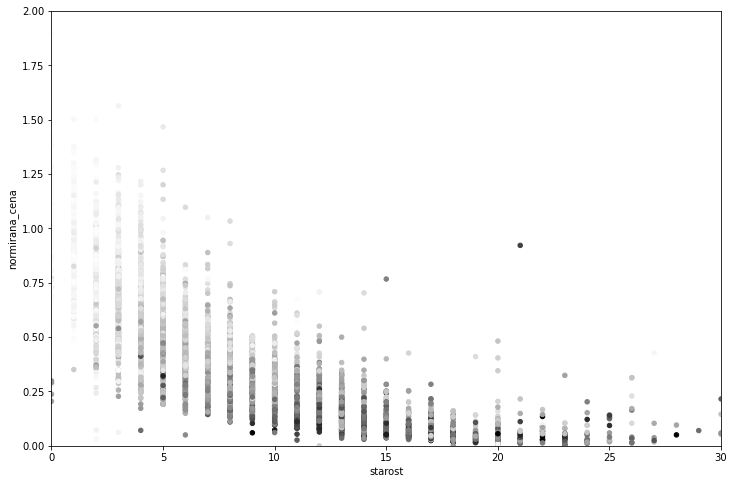

In [7]:
avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=avti_z_nc.stevilo_kilometrov.clip(0, 0.4e6),
    figsize=(12,8)
)

#### Vpliv moči motorja
temneje -> močnejši motor

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

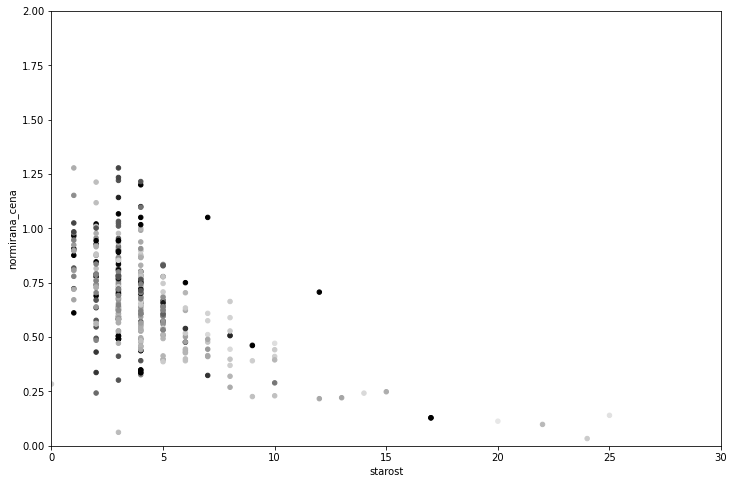

In [8]:
st_kilom = 0.5e5 # 120 000 km
fiks_avti_z_nc = avti_z_nc[
    avti_z_nc.stevilo_kilometrov.between(0.8*st_kilom, 1.2*st_kilom)
]
fiks_avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=fiks_avti_z_nc.konjske_moci.clip(0, 250),
    figsize=(12,8)
)

<AxesSubplot:xlabel='zaokroženi_kilovati'>

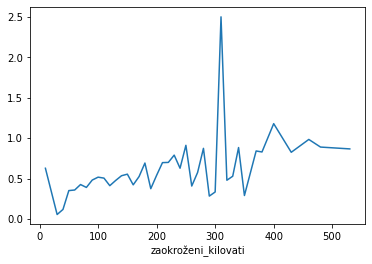

In [27]:
avti_z_nc["zaokroženi_kilovati"] = avti_z_nc.kilovati.round(-1)
avti_z_nc.groupby("zaokroženi_kilovati").normirana_cena.mean().plot()#.scatter("kilovati", "normirana_cena", xlim=(0,300))

<AxesSubplot:xlabel='zaokroženi_kilovati'>

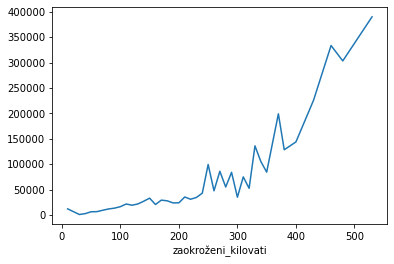

In [28]:
avti_z_nc.groupby("zaokroženi_kilovati").cena.mean().plot()

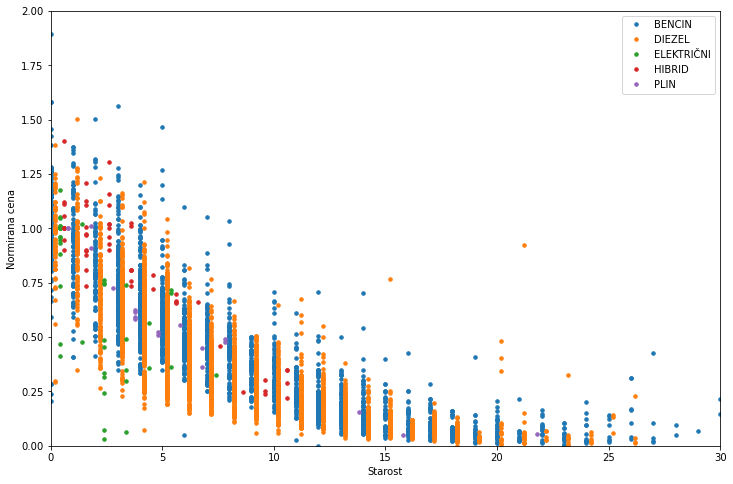

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

# fiks_moc_avti_z_nc = fiks_avti_z_nc[fiks_avti_z_nc.konjske_moci.between(80, 120)]

for i, (ime, skupina) in enumerate(avti_z_nc.groupby("vrsta_motorja")):
    ax.plot(
        skupina.starost+0.2*i,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

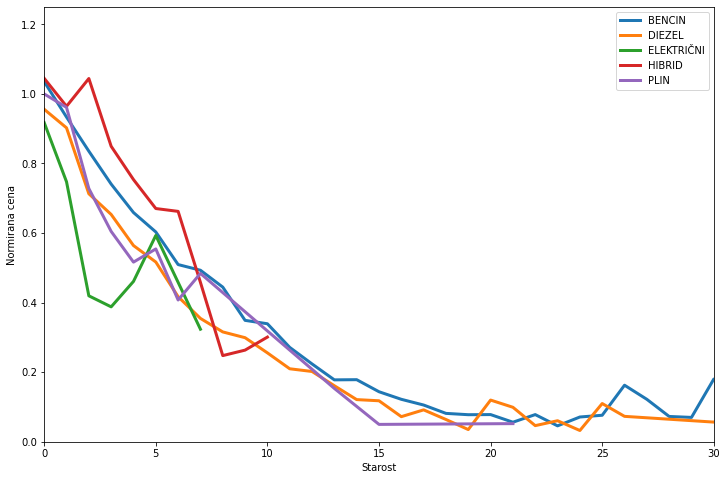

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

# fiks_moc_avti_z_nc = fiks_avti_z_nc[fiks_avti_z_nc.konjske_moci.between(80, 120)]

for i, (ime, skupina) in enumerate(avti_z_nc.groupby("vrsta_motorja")):
    povprecje = skupina.groupby("starost").normirana_cena.mean()
    ax.plot(
        povprecje.index,
        povprecje,
        lw=3,
        label=ime
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,1.25)
ax.legend(numpoints=1, loc='upper right')

<AxesSubplot:xlabel='vrsta_motorja'>

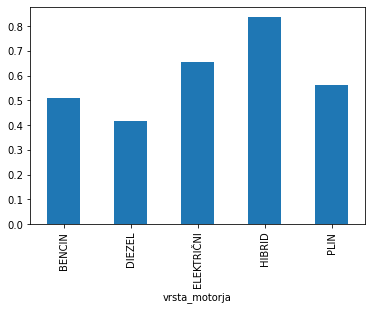

In [12]:
avti_z_nc.groupby("vrsta_motorja").normirana_cena.mean().plot.bar()

#### Vpliv vrste menjalnika

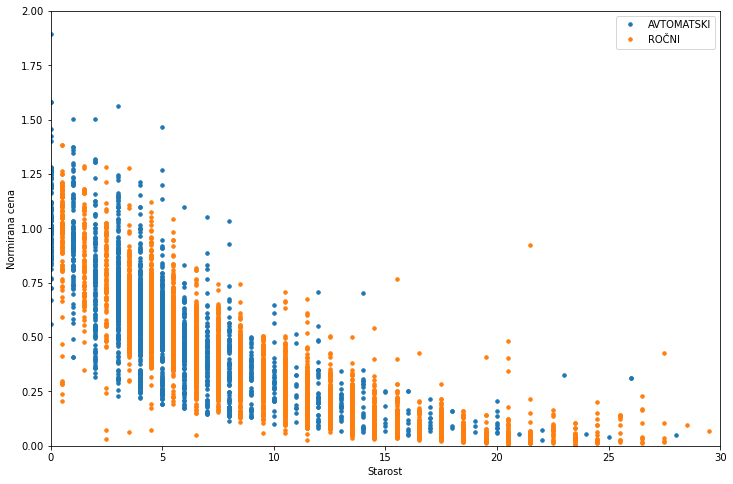

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

for i, (ime, skupina) in enumerate(avti_z_nc.groupby("menjalnik")):
    ax.plot(
        skupina.starost+i*0.5,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

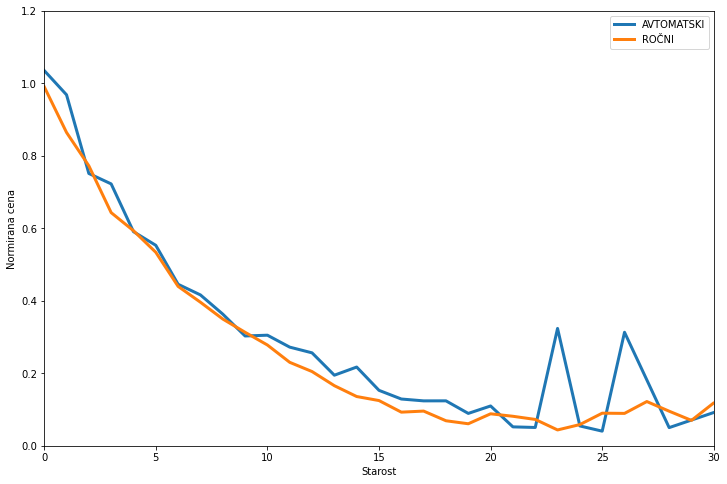

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

for i, (ime, skupina) in enumerate(avti_z_nc.groupby("menjalnik")):
    povprecje = skupina.groupby("starost").normirana_cena.mean()
    ax.plot(
        povprecje.index,
        povprecje,
        lw=3,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,1.2)
ax.legend(numpoints=1, loc='upper right')

<AxesSubplot:xlabel='menjalnik'>

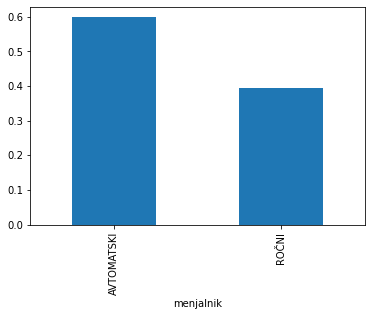

In [15]:
avti_z_nc.groupby("menjalnik").normirana_cena.mean().plot.bar()

#### Vpliv tipa vozila

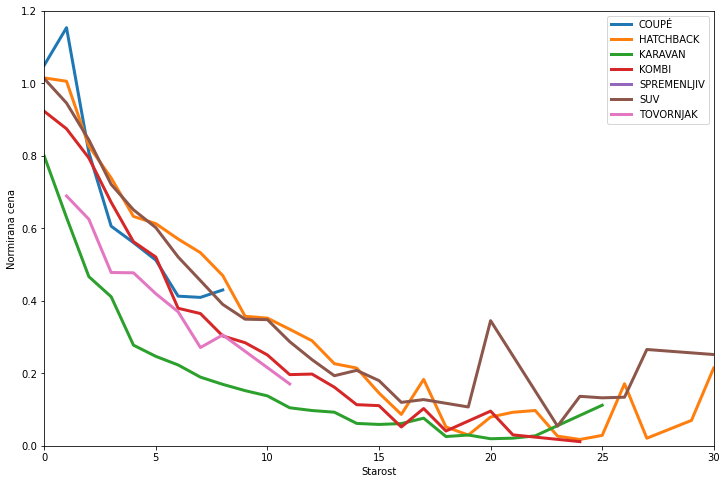

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

for i, (ime, skupina) in enumerate(avti_z_nc.groupby("tip_modela")):
    povprecje = skupina.groupby("starost").normirana_cena.mean()
    ax.plot(
        povprecje.index,
        povprecje,
        lw=3,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,1.2)
ax.legend(numpoints=1, loc='upper right')

<AxesSubplot:xlabel='tip_modela'>

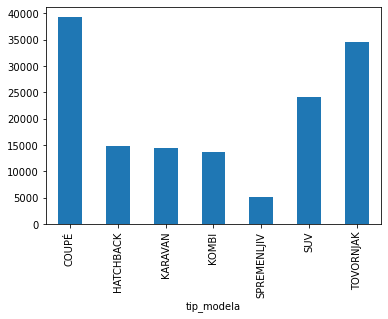

In [17]:
avti_z_nc.groupby("tip_modela").cena.mean().plot.bar()

### Število prestav skozi leta

<AxesSubplot:xlabel='leto_izdelave'>

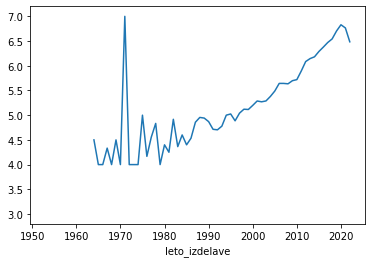

In [18]:
avti.groupby("leto_izdelave").stevilo_prestav.mean().plot()

### Najpogostejši modeli in različice posameznega modela
*Opomba*: oznaka **različica** predstavlja določeno izvedbo modela avtomobila (npr. z določenim motorjem in menjalnikom).

In [19]:
razlicice = avti.groupby(["ime_znamke", "ime_razlicice", "id_razlicice"])
naj_razlicice = razlicice.size().sort_values(ascending=False)
naj_modeli = avti.groupby("id_modela").size().sort_values(ascending=False)

naj_razlicice.head(6)

ime_znamke     ime_razlicice         id_razlicice
Mercedes-Benz  A-Class Sedan (V177)  16678.0         287
Volkswagen     Passat Variant        27296.0         272
Mercedes-Benz  CLA (C117)            16264.0         269
Volkswagen     Passat Variant        27295.0         206
               Tiguan                27026.0         192
               Passat Variant        27283.0         171
dtype: int64

<AxesSubplot:xlabel='leto_izdelave'>

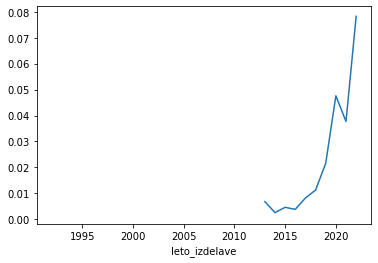

In [20]:
el_avti_po_letih = avti[avti.vrsta_motorja == "ELEKTRIČNI"].groupby("leto_izdelave").size()
avti_po_letih = avti.groupby("leto_izdelave").size()

(el_avti_po_letih / avti_po_letih).plot()